In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,...,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,...,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,...,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,...,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


In [4]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
data.dtypes

Id                   int64
groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [6]:
data.shape

(4357336, 26)

In [7]:
y = data['winPlacePerc']
X = data[['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [8]:
data.corr()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,1.000000,0.001050,0.006400,-0.032262,-0.015682,-0.034080,-0.031732,-0.018974,-0.017770,0.046803,...,-0.013686,-0.014290,-0.001939,-0.000135,0.001336,-0.001944,-0.014920,-0.033340,-0.011046,-0.018157
groupId,0.001050,1.000000,0.090547,0.000966,-0.000318,0.000549,0.001050,0.000195,-0.000606,0.000408,...,0.000147,-0.002865,-0.000300,0.000053,-0.000727,-0.000568,0.000046,0.001101,-0.000419,-0.000239
matchId,0.006400,0.090547,1.000000,0.000825,0.000164,0.000806,0.000346,0.000543,-0.001269,-0.000847,...,-0.000459,0.000064,-0.000660,0.000054,-0.000780,-0.000296,-0.000823,0.001212,-0.000458,0.000423
assists,-0.032262,0.000966,0.000825,1.000000,0.312516,0.421591,0.336822,0.213781,0.254413,-0.299240,...,0.212880,0.095768,0.011365,0.028043,0.004533,0.042473,0.286199,0.254903,0.074668,0.304642
boosts,-0.015682,-0.000318,0.000164,0.312516,1.000000,0.525806,0.354167,0.342132,0.543742,-0.540404,...,0.262386,0.308582,0.036168,0.115051,-0.001643,0.070621,0.643818,0.383074,0.121879,0.618075
damageDealt,-0.034080,0.000549,0.000806,0.421591,0.525806,1.000000,0.776050,0.618815,0.381556,-0.674264,...,0.282945,0.136733,0.054155,0.042669,0.057412,0.066731,0.397477,0.362554,0.110597,0.438552
DBNOs,-0.031732,0.001050,0.000346,0.336822,0.354167,0.776050,1.000000,0.512157,0.289970,-0.561372,...,0.294708,0.078993,0.034283,0.020948,0.077216,0.042757,0.269110,0.266989,0.084146,0.279475
headshotKills,-0.018974,0.000195,0.000543,0.213781,0.342132,0.618815,0.512157,1.000000,0.229129,-0.480663,...,0.171552,0.069235,0.015664,0.032103,0.012143,0.031140,0.255772,0.229016,0.063710,0.278705
heals,-0.017770,-0.000606,-0.001269,0.254413,0.543742,0.381556,0.289970,0.229129,1.000000,-0.394194,...,0.249880,0.280616,0.026778,0.082417,0.012462,0.054701,0.432847,0.313044,0.079382,0.427986
killPlace,0.046803,0.000408,-0.000847,-0.299240,-0.540404,-0.674264,-0.561372,-0.480663,-0.394194,1.000000,...,-0.282154,-0.204666,-0.048464,-0.092159,-0.030694,-0.055524,-0.580114,-0.469039,-0.137097,-0.708314


In [9]:
data.corr().iloc[25,:] > 0.1

Id                 False
groupId            False
matchId            False
assists             True
boosts              True
damageDealt         True
DBNOs               True
headshotKills       True
heals               True
killPlace          False
killPoints         False
kills               True
killStreaks         True
longestKill         True
maxPlace           False
numGroups          False
revives             True
rideDistance        True
roadKills          False
swimDistance        True
teamKills          False
vehicleDestroys    False
walkDistance        True
weaponsAcquired     True
winPoints           True
winPlacePerc        True
Name: winPlacePerc, dtype: bool

In [10]:
X = X.drop(columns = ['Id','groupId','matchId','killPlace','killPoints','maxPlace','numGroups','roadKills','teamKills','vehicleDestroys'])

In [11]:
X.shape

(4357336, 15)

In [16]:
test_data = pd.read_csv('test.csv')

In [17]:
test_data.shape

(1867913, 25)

In [19]:
test_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object')

In [20]:
X_t = test_data[['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals', 'kills','killStreaks', 'longestKill', 'revives','rideDistance', 'swimDistance','walkDistance', 'weaponsAcquired', 'winPoints']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

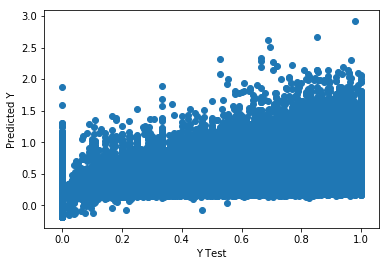

In [29]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [30]:
lm.coef_

array([ 1.32380929e-02,  1.79533997e-02,  1.30805407e-04, -2.68672148e-02,
       -4.19749209e-03,  2.47491466e-03,  2.11772253e-03,  3.66303683e-02,
        3.77224691e-05,  1.69125351e-02,  5.79213677e-06,  2.34208827e-04,
        1.63436817e-04,  2.15597483e-02,  3.12793267e-04])

In [31]:
lm.intercept_

-0.2952771207195704

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r_squared:', metrics.r2_score(y_test,predictions))

MAE: 0.12938801331447783
MSE: 0.02715848555160286
RMSE: 0.16479831780574358
r_squared: 0.713738000532213


In [33]:
metrics.explained_variance_score(y_test, predictions)

0.7137386206236337